In [1]:
# load modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline 

#load data 
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

There are 11 features, we can try to know how many different values have each of the features..(binary, categorical, conitnuous)

# Mirem correlacions en plan bestia, viam que hi veiem a les dades brutes

hombreeeee!, ja es veuen un parell de coses interessants: **Survived esta directament correlacionat amb Fare (mes fare, mes survived) i inversament amb Pclass (pclas 1, mes survival)**

# Let's do some basic pivot tables and see what we have

Destriem Deck i numero de la cabina

In [2]:
# Ara podem aplicar el slice al df_train original i reomplir els NaNs del Deck amb X
df_train["Deck"] = df_train["Cabin"].str.slice(0,1)
df_train["Number"] = df_train["Cabin"].str.slice(1,4).str.extract('([0-9]+)').astype('float')
df_train['Deck'][df_train['Deck'].isnull()]='X'

df_test["Deck"] = df_test["Cabin"].str.slice(0,1)
df_test["Number"] = df_test["Cabin"].str.slice(1,4).str.extract('([0-9]+)').astype('float')
df_test['Deck'][df_test['Deck'].isnull()]='X'

C:\Users\Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Provem un hot-encoding per obtenir una taula amb 1 i 0s per cada columna de Desk
Haurem de fer una altra per si es home-dona, una altra per P-Class i edat? (abans hem de categoritzar-la)
info de: https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159


In [3]:
#!pip install category_encoders
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
# funcio hot encoding. Es tracta d'una funcio que agafa una variable categorica (passada a array) i crea un array on cada categoria es una columna amb 0 o 1
def hot_encode_PC(value_array):
    """Utility function convert variable to columns with 0 and 1, after you have to pass it manually de column names
    """
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    print(integer_encoded)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

La Deck T es un error, no existeix, nomes hi ha un passatger i dificulat analisi posterior perque al test no n'hi han. Per 

In [5]:
values = array(df_train['Deck'])
print(values)
onehot_encoded = hot_encode_PC(values)

# ara el one hhot encode es A(0), B, C(2), D, E(4), F, G(6), T(7) i X(8)
df_train['Deck_A']=onehot_encoded[:,0]
df_train['Deck_B']=onehot_encoded[:,1]
df_train['Deck_C']=onehot_encoded[:,2]
df_train['Deck_D']=onehot_encoded[:,3]
df_train['Deck_E']=onehot_encoded[:,4]
df_train['Deck_F']=onehot_encoded[:,5]
df_train['Deck_G']=onehot_encoded[:,6]
df_train['Deck_X']=onehot_encoded[:,8]

['X' 'C' 'X' 'C' 'X' 'X' 'E' 'X' 'X' 'X' 'G' 'C' 'X' 'X' 'X' 'X' 'X' 'X'
 'X' 'X' 'X' 'D' 'X' 'A' 'X' 'X' 'X' 'C' 'X' 'X' 'X' 'B' 'X' 'X' 'X' 'X'
 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'D' 'X'
 'B' 'C' 'X' 'X' 'X' 'X' 'X' 'B' 'C' 'X' 'X' 'X' 'F' 'X' 'X' 'X' 'X' 'X'
 'X' 'X' 'X' 'F' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'C' 'X'
 'X' 'X' 'E' 'X' 'X' 'X' 'A' 'D' 'X' 'X' 'X' 'X' 'D' 'X' 'X' 'X' 'X' 'X'
 'X' 'X' 'C' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'B' 'X' 'X' 'X' 'X' 'E' 'D' 'X'
 'X' 'X' 'F' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'D' 'C' 'X' 'B' 'X' 'X' 'X' 'X'
 'X' 'X' 'X' 'X' 'F' 'X' 'X' 'C' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X'
 'X' 'X' 'X' 'X' 'E' 'X' 'X' 'X' 'B' 'X' 'X' 'X' 'A' 'X' 'X' 'C' 'X' 'X'
 'X' 'X' 'X' 'F' 'X' 'A' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'F' 'B' 'B' 'X' 'X'
 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'G' 'X' 'X' 'X' 'A' 'X' 'X' 'X' 'X' 'X' 'D'
 'X' 'X' 'D' 'X' 'X' 'X' 'X' 'X' 'C' 'X' 'X' 'X' 'X' 'X' 'C' 'X' 'X' 'X'
 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'C' 'X

In [6]:
values = array(df_test['Deck'])
print(values)
onehot_encoded = hot_encode_PC(values)

# ara el one hhot encode es A(0), B, C(2), D, E(4), F, G(6), T(7) i X(8)
df_test['Deck_A']=onehot_encoded[:,0]
df_test['Deck_B']=onehot_encoded[:,1]
df_test['Deck_C']=onehot_encoded[:,2]
df_test['Deck_D']=onehot_encoded[:,3]
df_test['Deck_E']=onehot_encoded[:,4]
df_test['Deck_F']=onehot_encoded[:,5]
df_test['Deck_G']=onehot_encoded[:,6]
df_test['Deck_X']=onehot_encoded[:,7]

['X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'B' 'X' 'E' 'X' 'X' 'X'
 'X' 'X' 'X' 'X' 'X' 'X' 'B' 'X' 'B' 'X' 'A' 'X' 'X' 'X' 'X' 'X' 'C' 'X'
 'X' 'X' 'X' 'X' 'X' 'D' 'X' 'X' 'D' 'X' 'A' 'X' 'D' 'X' 'C' 'X' 'X' 'C'
 'X' 'X' 'X' 'F' 'X' 'B' 'X' 'X' 'X' 'X' 'B' 'X' 'X' 'X' 'C' 'C' 'X' 'X'
 'X' 'D' 'C' 'C' 'X' 'C' 'X' 'X' 'X' 'C' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X'
 'X' 'X' 'B' 'X' 'X' 'X' 'C' 'X' 'X' 'X' 'C' 'X' 'X' 'X' 'X' 'X' 'X' 'X'
 'X' 'F' 'X' 'X' 'A' 'X' 'C' 'X' 'X' 'G' 'C' 'X' 'X' 'X' 'C' 'X' 'X' 'X'
 'X' 'X' 'X' 'X' 'X' 'C' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'B' 'X'
 'X' 'X' 'E' 'X' 'X' 'X' 'C' 'X' 'X' 'X' 'X' 'X' 'C' 'X' 'D' 'X' 'X' 'X'
 'X' 'X' 'X' 'X' 'B' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'C' 'F' 'E'
 'X' 'E' 'D' 'X' 'B' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'E' 'X'
 'X' 'X' 'X' 'X' 'C' 'X' 'X' 'X' 'X' 'X' 'A' 'X' 'X' 'X' 'X' 'X' 'X' 'B'
 'X' 'X' 'C' 'X' 'X' 'X' 'F' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X'
 'C' 'X' 'D' 'X' 'X' 'C' 'X' 'X' 'E' 'X' 'X' 'D' 'X

# La part de la Cabin i la Deck ja està feta.

# El seguent punt seria categoritzar edat? 
Resulta que en aquella època eren molt etsrictes amb el tema de dones i nens primer. Com categoritzem edat?
1. Trams de 4 en 4? (sortirien uns 20 grups)
2. o directament establir grups: 0-2 (bebe), 2-10(infant), 10-16 (nen), 16-20 (jove), 20-60 (Adult), 60-100 (Vell) i veure si hi ha relacio amb supervivencia?

#### Abans pero hem d'omplir les edats sense dades no?
La Age te una rlacio important amb la Pclass i la SibSp

In [7]:
df_train['Age'][df_train['Age'].isnull()] = df_train['Age'].mean()

df_test['Age'][df_test['Age'].isnull()] = df_test['Age'].mean()

C:\Users\Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# en aquest bloc definim una columna categoritzant les edats
bins= [0,2,10,16,20,60,100]
labels = ['bebe','infant','nen','jove','adult','vell']
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)

In [9]:
# ara tornem a fer un hot encoding pels grups d'edats
values = array(df_train['AgeGroup'])
print(values)
onehot_encoded = hot_encode_PC(values)

df_train['adult']=onehot_encoded[:,0]
df_train['bebe']=onehot_encoded[:,1]
df_train['infant']=onehot_encoded[:,2]
df_train['jove']=onehot_encoded[:,3]
df_train['nen']=onehot_encoded[:,4]
df_train['vell']=onehot_encoded[:,5]

['adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'infant' 'adult'
 'nen' 'infant' 'adult' 'adult' 'adult' 'nen' 'adult' 'infant' 'adult'
 'adult' 'adult' 'adult' 'adult' 'nen' 'adult' 'infant' 'adult' 'adult'
 'jove' 'adult' 'adult' 'adult' 'adult' 'adult' 'vell' 'adult' 'adult'
 'adult' 'adult' 'jove' 'nen' 'adult' 'adult' 'adult' 'infant' 'jove'
 'adult' 'adult' 'adult' 'adult' 'jove' 'infant' 'adult' 'adult' 'adult'
 'vell' 'adult' 'adult' 'adult' 'infant' 'nen' 'adult' 'adult' 'adult'
 'infant' 'adult' 'adult' 'adult' 'jove' 'jove' 'adult' 'adult' 'jove'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'bebe' 'adult' 'adult'
 'adult' 'adult' 'adult' 'jove' 'adult' 'jove' 'adult' 'adult' 'adult'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'vell' 'adult' 'adult'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult'
 'adult' 'adult' 'adult' 'nen' 'adult' 'adult' 'jove' 'adult' 'vell'
 'adult' 'adult' 'infant' 'adult' 'adult' 'adult' 'adult' 'adult' 'nen

llegenda --> adult:0, bebe:1 , infant:2, jove=3, nen=4,  vell=5

In [10]:
# ara tornem a fer un hot encoding pels grups d'edats
values = array(df_test['AgeGroup'])
print(values)
onehot_encoded = hot_encode_PC(values)

df_test['adult']=onehot_encoded[:,0]
df_test['bebe']=onehot_encoded[:,1]
df_test['infant']=onehot_encoded[:,2]
df_test['jove']=onehot_encoded[:,3]
df_test['nen']=onehot_encoded[:,4]
df_test['vell']=onehot_encoded[:,5]

['adult' 'adult' 'vell' 'adult' 'adult' 'nen' 'adult' 'adult' 'jove'
 'adult' 'adult' 'adult' 'adult' 'vell' 'adult' 'adult' 'adult' 'adult'
 'adult' 'adult' 'adult' 'infant' 'adult' 'adult' 'adult' 'adult' 'adult'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'jove'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult'
 'adult' 'adult' 'adult' 'vell' 'adult' 'adult' 'adult' 'adult' 'adult'
 'adult' 'nen' 'adult' 'adult' 'adult' 'adult' 'jove' 'adult' 'jove'
 'adult' 'nen' 'adult' 'jove' 'adult' 'adult' 'vell' 'adult' 'adult'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'infant'
 'vell' 'adult' 'adult' 'adult' 'adult' 'adult' 'jove' 'adult' 'infant'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'vell' 'adult' 'adult'
 'adult' 'adult' 'adult' 'adult' 'adult' 'jove' 'adult' 'adult' 'adult'
 'adult' 'jove' 'adult' 'adult' 'adult' 'jove' 'vell' 'jove' 'adult'
 'bebe' 'adult' 'adult' 'nen' 'adult' 'adult' 'adult' 'adult' 'jove'
 '

# Ara faria el hot encoding pel Pclass, Sexe, fare, SibSp i Parch

In [11]:
# ---------SEX---
values = array(df_train['Sex'])
print(values)
onehot_encoded = hot_encode_PC(values)

df_train['female']=onehot_encoded[:,0]
df_train['male']=onehot_encoded[:,1]

['male' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'ma

In [12]:
# ---------SEX---
values = array(df_test['Sex'])
print(values)
onehot_encoded = hot_encode_PC(values)

df_test['female']=onehot_encoded[:,0]
df_test['male']=onehot_encoded[:,1]

['male' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'female'
 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female'
 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'female'
 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'female' 'male' 'male' 'female' 'mal

In [13]:
# ---------Pclass---
values = array(df_train['Pclass'])
print(values)
onehot_encoded = hot_encode_PC(values)

df_train['Pclass1']=onehot_encoded[:,0]
df_train['Pclass2']=onehot_encoded[:,1]
df_train['Pclass3']=onehot_encoded[:,2]

[3 1 3 1 3 3 1 3 3 2 3 1 3 3 3 2 3 2 3 3 2 2 3 1 3 3 3 1 3 3 1 1 3 2 1 1 3
 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 1 2 1 1 2 3 2 3 3 1 1 3 1 3 2 3 3 3 2 3 2 3
 3 3 3 3 2 3 3 3 3 1 2 3 3 3 1 3 3 3 1 3 3 3 1 1 2 2 3 3 1 3 3 3 3 3 3 3 1
 3 3 3 3 3 3 2 1 3 2 3 2 2 1 3 3 3 3 3 3 3 3 2 2 2 1 1 3 1 3 3 3 3 2 2 3 3
 2 2 2 1 3 3 3 1 3 3 3 3 3 2 3 3 3 3 1 3 1 3 1 3 3 3 1 3 3 1 2 3 3 2 3 2 3
 1 3 1 3 3 2 2 3 2 1 1 3 3 3 2 3 3 3 3 3 3 3 3 3 1 3 2 3 2 3 1 3 2 1 2 3 2
 3 3 1 3 2 3 2 3 1 3 2 3 2 3 2 2 2 2 3 3 2 3 3 1 3 2 1 2 3 3 1 3 3 3 1 1 1
 2 3 3 1 1 3 2 3 3 1 1 1 3 2 1 3 1 3 2 3 3 3 3 3 3 1 3 3 3 2 3 1 1 2 3 3 1
 3 1 1 1 3 3 3 2 3 1 1 1 2 1 1 1 2 3 2 3 2 2 1 1 3 3 2 2 3 1 3 2 3 1 3 1 1
 3 1 3 1 1 3 1 2 1 2 2 2 2 2 3 3 3 3 1 3 3 3 3 1 2 3 3 3 2 3 3 3 3 1 3 3 1
 1 3 3 1 3 1 3 1 3 3 1 3 3 1 3 2 3 2 3 2 1 3 3 1 3 3 3 2 2 2 3 3 3 3 3 2 3
 2 3 3 3 3 1 2 3 3 2 2 2 3 3 3 3 3 3 3 2 2 3 3 1 3 2 3 1 1 3 2 1 2 2 3 3 2
 3 1 2 1 3 1 2 3 1 1 3 3 1 1 2 3 1 3 1 2 3 3 2 1 3 3 3 3 2 2 3 1 2 3 3 3 3
 2 3 3 1 3 1 1 3 3 3 3 1 

In [14]:
# ---------Pclass---
values = array(df_test['Pclass'])
print(values)
onehot_encoded = hot_encode_PC(values)

df_test['Pclass1']=onehot_encoded[:,0]
df_test['Pclass2']=onehot_encoded[:,1]
df_test['Pclass3']=onehot_encoded[:,2]

[3 3 2 3 3 3 3 2 3 3 3 1 1 2 1 2 2 3 3 3 1 3 1 1 1 3 1 3 1 3 2 2 3 3 1 3 3
 3 3 3 3 1 3 2 1 3 1 3 1 3 1 2 2 1 2 3 3 3 3 1 3 2 3 3 1 2 3 1 1 1 3 3 3 1
 1 1 3 1 2 3 3 1 1 3 2 3 3 3 3 2 3 3 1 3 1 3 1 3 3 3 1 2 3 3 3 3 3 3 3 2 2
 3 1 3 1 3 3 3 1 2 2 3 1 3 3 3 3 3 2 3 3 1 3 3 3 3 3 2 3 3 3 1 1 2 1 3 1 3
 1 2 1 3 3 3 3 3 1 3 1 3 3 3 2 3 2 3 1 3 1 3 3 3 3 3 3 2 2 1 2 1 2 1 1 3 1
 2 2 3 3 2 2 1 3 2 2 3 1 3 2 3 3 3 1 2 2 1 3 2 1 3 3 3 2 2 3 1 3 1 1 3 2 3
 2 3 1 3 3 3 3 2 2 1 3 3 1 3 1 3 2 1 1 2 1 3 3 1 2 2 2 3 2 3 1 3 3 3 3 3 2
 3 3 3 2 3 2 3 1 3 3 3 1 3 1 3 3 2 2 2 2 2 3 3 3 3 3 3 3 1 3 3 1 3 3 1 3 3
 2 3 1 3 3 2 2 3 3 1 1 3 1 3 3 3 3 3 1 3 1 2 3 2 3 3 2 1 1 3 2 1 2 2 2 1 3
 3 3 1 2 3 2 3 2 3 3 1 3 3 2 3 2 2 1 2 2 2 3 1 1 3 3 3 3 2 2 3 1 3 3 3 1 2
 2 1 1 2 1 1 3 2 1 3 3 3 3 3 2 2 3 2 3 3 1 1 3 2 3 1 3 1 3 3 1 2 1 1 1 2 2
 1 3 3 3 1 3 3 1 3 3 3]
[2 2 1 2 2 2 2 1 2 2 2 0 0 1 0 1 1 2 2 2 0 2 0 0 0 2 0 2 0 2 1 1 2 2 0 2 2
 2 2 2 2 0 2 1 0 2 0 2 0 2 0 1 1 0 1 2 2 2 2 0 2 1 2 2 0 1 2 0 0 0 2 2 2 0
 

In [15]:
# ---------SibSP--- TRAIN
del values
print (df_train['SibSp'].unique())
values = array(df_train['SibSp'])
print(values)
onehot_encoded = hot_encode_PC(values)

df_train['SibSp0']=onehot_encoded[:,0]
df_train['SibSp1']=onehot_encoded[:,1]
df_train['SibSp2']=onehot_encoded[:,2]
df_train['SibSp3']=onehot_encoded[:,3]
df_train['SibSp4']=onehot_encoded[:,4]
df_train['SibSp5']=onehot_encoded[:,5]
df_train['SibSp8']=onehot_encoded[:,6]

[1 0 3 4 2 5 8]
[1 1 0 1 0 0 0 3 0 1 1 0 0 1 0 0 4 0 1 0 0 0 0 0 3 1 0 3 0 0 0 1 0 0 1 1 0
 0 2 1 1 1 0 1 0 0 1 0 2 1 4 0 1 1 0 0 0 0 1 5 0 0 1 3 0 1 0 0 4 2 0 5 0 1
 0 0 0 0 0 0 0 0 0 0 0 3 1 0 3 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1 0
 1 0 1 0 0 0 1 0 4 2 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 2
 0 0 0 1 0 0 0 0 0 0 0 8 0 0 0 0 4 0 0 1 0 0 0 4 1 0 0 1 3 0 0 0 8 0 4 2 0
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 8 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 3 1 0 0 4 0 0 1 0 0 0 1 1 0 0 0 2 0 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 4 1 0 0 0 4 1 0 0 0 0 0 0 0 1 0 0 4 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 2 0 0 0 1 0 1 1 0 0 2 1 0 1 0 1 0 0 1 0 0 0 1 8 0 0 0 1 0 2 0 0
 2 1 0 1 0 0 0 1 3 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 0 3 1 0 0 0 0 0 0 0 1 0 0 5 0 0 0 1 0 2 1 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 3 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 2 2 1 0 1 0 1 0
 0 0 0 0 2 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 1 1 0 0 5
 0 0 0 1 

In [16]:
# ---------SibSP--- TEST
del values
print (df_test['SibSp'].unique())
values = array(df_test['SibSp'])
print(values)
onehot_encoded = hot_encode_PC(values)

df_test['SibSp0']=onehot_encoded[:,0]
df_test['SibSp1']=onehot_encoded[:,1]
df_test['SibSp2']=onehot_encoded[:,2]
df_test['SibSp3']=onehot_encoded[:,3]
df_test['SibSp4']=onehot_encoded[:,4]
df_test['SibSp5']=onehot_encoded[:,5]
df_test['SibSp8']=onehot_encoded[:,6]

[0 1 2 3 4 5 8]
[0 1 0 0 1 0 0 1 0 2 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 2 1 2 1 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 2 3 0 4 0 0 1 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 2 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 1 5 0 1 0 0 3 0 0
 0 1 0 0 0 0 4 0 0 0 0 0 0 1 0 0 0 1 0 2 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1
 0 0 2 8 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 4 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 1 2 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 2 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 2 0 0 1 8 1 0 0 1 1 1 0 0 0
 1 0 0 0 1 0 2 0 0 4 0 0 0 1 0 1 0 0 0 3 0 0 0 0 3 1 0 1 0 0 0 1 0 0 1 0 1
 1 0 1 0 1 0 0 0 0 0 1]
[0 1 0 0 1 0 0 1 0 2 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 2 1 2 1 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 2 3 0 4 0 0 1 0 0 0 0 0 2 0 0

In [17]:
# ---------Parch--- TRAIN
del values
print (df_train['Parch'].unique())
values = array(df_train['Parch'])
print(values)
onehot_encoded = hot_encode_PC(values)

df_train['Parch0']=onehot_encoded[:,0]
df_train['Parch1']=onehot_encoded[:,1]
df_train['Parch2']=onehot_encoded[:,2]
df_train['Parch3']=onehot_encoded[:,3]
df_train['Parch4']=onehot_encoded[:,4]
df_train['Parch5']=onehot_encoded[:,5]
df_train['Parch6']=onehot_encoded[:,6]

[0 1 2 5 3 4 6]
[0 0 0 0 0 0 0 1 2 0 1 0 0 5 0 0 1 0 0 0 0 0 0 0 1 5 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 1 0 0 0 2 2 0 0 0 2 0 1 0 0 2 0 0 2 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 3 0 2 0 0 0 0 2 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 2 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1 0 2
 2 0 0 0 0 2 0 1 0 0 0 2 1 0 0 0 1 2 1 4 0 0 0 1 1 0 0 1 1 0 0 0 2 0 2 1 2
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 1 0 0 1 0 0 2 2 0 0 0
 1 0 2 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 1 0 0 0 0 0 2 0 0 0 0 0 2 1 0 1 0 0 0 2 1 0 0 0 1 2 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 4 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 2 0 2 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 2 2 3 4 0 1 0 0 0
 0 2 1 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 1 2
 0 0 0 0 

In [18]:
# ---------Parch--- TEST
# Apareix un 9 que no se que es, aquest el deixarem sense omplir
del values
print (df_test['Parch'].unique())
values = array(df_test['Parch'])
print(values)
onehot_encoded = hot_encode_PC(values)

df_test['Parch0']=onehot_encoded[:,0]
df_test['Parch1']=onehot_encoded[:,1]
df_test['Parch2']=onehot_encoded[:,2]
df_test['Parch3']=onehot_encoded[:,3]
df_test['Parch4']=onehot_encoded[:,4]
df_test['Parch5']=onehot_encoded[:,5]
df_test['Parch6']=onehot_encoded[:,6]

[0 1 3 2 4 6 5 9]
[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 3 0 1 0 0 0 0 0 2 2 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 1 2 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 4 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 4 0 0 0 0 0 0 6 2 0 3 0 0 0 0 0
 0 1 1 0 0 2 2 0 0 0 0 2 0 1 0 0 0 1 0 2 0 0 0 0 0 0 5 2 0 0 3 2 0 1 0 0 1
 0 1 0 2 0 0 0 1 0 2 0 2 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 1 1 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 1 0 2 0 0 1 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 2 0 0 0 0 0 1 0 0 1 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0
 1 0 0 0 2 0 0 0 0 9 1 1 0 0 0 0 0 1 0 0 2 2 0 0 0 0 0 2 1 0 0 0 9 0 0 1 0
 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 2 0 0 0 1 0 1 2 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1]
[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 3 0 1 0 0 0 0 0 2 2 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 1 2 0 1 0 0 0 0 0 0 0 0 2 0

# ara afegiria una categoritzacio del FARE (sembla que te certa correlacio amb supervivencia)
Al test, el Fare te 1 NaN... podriem veure quina classe es, i li posem la mitja en funcio de la classe?

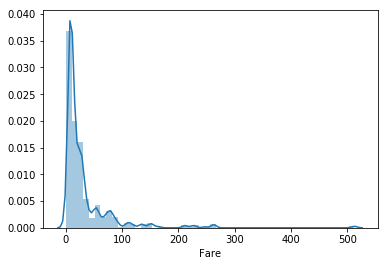

In [19]:
sns.distplot(df_train['Fare'])
plt.show()


In [20]:
print (df_test['Fare'].mean())
print (df_test.groupby(['Pclass'])['Fare'].mean())

35.6271884892086
Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64


In [21]:
pd.set_option('display.max_columns', 47)
print(df_test[df_test['Fare'].isnull()])

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked Deck  Number  Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  \
152   NaN   NaN        S    X     NaN     0.0     0.0     0.0     0.0     0.0   

     Deck_F  Deck_G  Deck_X AgeGroup  adult  bebe  infant  jove  nen  vell  \
152     0.0     0.0     1.0     vell    0.0   0.0     0.0   0.0  0.0   1.0   

     female  male  Pclass1  Pclass2  Pclass3  SibSp0  SibSp1  SibSp2  SibSp3  \
152     0.0   1.0      0.0      0.0      1.0     1.0     0.0     0.0     0.0   

     SibSp4  SibSp5  SibSp8  Parch0  Parch1  Parch2  Parch3  Parch4  Parch5  \
152     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   

     Parch6  
152     0.0  


El que tenim sense dades es de 3 classe, posem el valor de fare mig per pclass==3

In [22]:
df_test['Fare'][df_test['Fare'].isnull()] = 12.46

C:\Users\Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
# fem grups de fare en plan: 0,20,40,60,80,100,200,300,400,500,600
# en aquest bloc definim una columna categoritzant les edats
bins= [0,20,40,60,80,100,200,300,400,500,600]
labels = ['20','40','60','80','100','200','300','400','500','600']
df_train['FareGroup'] = pd.cut(df_train['Fare'], bins=bins, labels=labels, right=False)
print(df_train[['Fare','FareGroup']])

del values
print (df_train['FareGroup'].unique())
values = array(df_train['FareGroup'])
print(values)
onehot_encoded = hot_encode_PC(values)


# ha codificat aixi: 100-0, 20-1, 200-2, 300-3,  40-4, 60-5, 600-6, 80-7
df_train['Fare20']=onehot_encoded[:,0]
df_train['Fare40']=onehot_encoded[:,1]
df_train['Fare60']=onehot_encoded[:,2]
df_train['Fare80']=onehot_encoded[:,3]
df_train['Fare100']=onehot_encoded[:,4]
df_train['Fare200']=onehot_encoded[:,5]
df_train['Fare300']=onehot_encoded[:,6]
df_train['Fare600']=onehot_encoded[:,7]

         Fare FareGroup
0      7.2500        20
1     71.2833        80
2      7.9250        20
3     53.1000        60
4      8.0500        20
5      8.4583        20
6     51.8625        60
7     21.0750        40
8     11.1333        20
9     30.0708        40
10    16.7000        20
11    26.5500        40
12     8.0500        20
13    31.2750        40
14     7.8542        20
15    16.0000        20
16    29.1250        40
17    13.0000        20
18    18.0000        20
19     7.2250        20
20    26.0000        40
21    13.0000        20
22     8.0292        20
23    35.5000        40
24    21.0750        40
25    31.3875        40
26     7.2250        20
27   263.0000       300
28     7.8792        20
29     7.8958        20
..        ...       ...
861   11.5000        20
862   25.9292        40
863   69.5500        80
864   13.0000        20
865   13.0000        20
866   13.8583        20
867   50.4958        60
868    9.5000        20
869   11.1333        20
870    7.8958   

In [24]:
df_test['FareGroup'] = pd.cut(df_test['Fare'], bins=bins, labels=labels, right=False)
print(df_test[['Fare','FareGroup']])

del values
print (df_test['FareGroup'].unique())
values = array(df_test['FareGroup'])
print(values)
onehot_encoded = hot_encode_PC(values)


# ha codificat aixi: 100-0, 20-1, 200-2, 300-3,  40-4, 60-5, 600-6, 80-7
df_test['Fare20']=onehot_encoded[:,0]
df_test['Fare40']=onehot_encoded[:,1]
df_test['Fare60']=onehot_encoded[:,2]
df_test['Fare80']=onehot_encoded[:,3]
df_test['Fare100']=onehot_encoded[:,4]
df_test['Fare200']=onehot_encoded[:,5]
df_test['Fare300']=onehot_encoded[:,6]
df_test['Fare600']=onehot_encoded[:,7]

         Fare FareGroup
0      7.8292        20
1      7.0000        20
2      9.6875        20
3      8.6625        20
4     12.2875        20
5      9.2250        20
6      7.6292        20
7     29.0000        40
8      7.2292        20
9     24.1500        40
10     7.8958        20
11    26.0000        40
12    82.2667       100
13    26.0000        40
14    61.1750        80
15    27.7208        40
16    12.3500        20
17     7.2250        20
18     7.9250        20
19     7.2250        20
20    59.4000        60
21     3.1708        20
22    31.6833        40
23    61.3792        80
24   262.3750       300
25    14.5000        20
26    61.9792        80
27     7.2250        20
28    30.5000        40
29    21.6792        40
..        ...       ...
388    7.7500        20
389   21.0750        40
390   93.5000       100
391   39.4000        40
392   20.2500        40
393   10.5000        20
394   22.0250        40
395   60.0000        80
396    7.2500        20
397   79.2000   

In [25]:
print(df_test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked Deck  Number  Deck_A  \
0  34.5      0      0   330911   7.8292   NaN        Q    X     NaN     0.0   
1  47.0      1      0   363272   7.0000   NaN        S    X     NaN     0.0   
2  62.0      0      0   240276   9.6875   NaN        Q    X     NaN     0.0   
3  27.0      0      0   315154   8.6625   NaN        S    X     NaN     0.0   
4  22.0      1      1  3101298  12.2875   NaN        S    X     NaN     0.0   

   Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  D

# el dataframe amb el que aplicarem el model: df_Titanic

In [48]:
# ara ens quedem amb un dataframe amb nomes aquells labels que ens interssen pel model
# Submission 0
df_Titanic = df_train[['Survived','adult','bebe','infant','jove','nen','vell','female','male','Pclass1','Pclass2',
                       'Pclass3','Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_X',
                       'SibSp0','SibSp1','SibSp2','SibSp3','SibSp4','SibSp5','SibSp8',
                       'Parch0','Parch1','Parch2','Parch3','Parch4','Parch5','Parch6',
                       'Fare20','Fare40','Fare60','Fare80','Fare100','Fare200','Fare300','Fare600']]

df_Titanic_test = df_test[['adult','bebe','infant','jove','nen','vell','female','male','Pclass1','Pclass2',
                       'Pclass3','Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_X',
                       'SibSp0','SibSp1','SibSp2','SibSp3','SibSp4','SibSp5','SibSp8',
                       'Parch0','Parch1','Parch2','Parch3','Parch4','Parch5','Parch6',
                       'Fare20','Fare40','Fare60','Fare80','Fare100','Fare200','Fare300','Fare600']]


## Submission 1

df_Titanic = df_train[['Survived','adult','bebe','infant','jove','nen','vell','female','male','Pclass1','Pclass2',
                       'Pclass3','Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_X',
                       'SibSp0','SibSp1','SibSp2','SibSp3','SibSp4','SibSp5','SibSp8',
                       'Fare20','Fare40','Fare60','Fare80','Fare100','Fare200','Fare300','Fare600']]

df_Titanic_test = df_test[['adult','bebe','infant','jove','nen','vell','female','male','Pclass1','Pclass2',
                       'Pclass3','Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_X',
                       'SibSp0','SibSp1','SibSp2','SibSp3','SibSp4','SibSp5','SibSp8',
                       'Fare20','Fare40','Fare60','Fare80','Fare100','Fare200','Fare300','Fare600']]

# Submission 2

df_Titanic = df_train[['Survived','adult','bebe','infant','jove','nen','vell','female','male','Pclass1','Pclass2',
                       'Pclass3','Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_X',
                       'SibSp0','SibSp1','SibSp2','SibSp3','SibSp4','SibSp5','SibSp8']]

df_Titanic_test = df_test[['adult','bebe','infant','jove','nen','vell','female','male','Pclass1','Pclass2',
                       'Pclass3','Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_X',
                       'SibSp0','SibSp1','SibSp2','SibSp3','SibSp4','SibSp5','SibSp8']]

# Submission 3

df_Titanic = df_train[['Survived','adult','bebe','infant','jove','nen','vell','female','male','Pclass1','Pclass2',
                       'Pclass3','Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_X']]

df_Titanic_test = df_test[['adult','bebe','infant','jove','nen','vell','female','male','Pclass1','Pclass2',
                       'Pclass3','Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_X']]

In [49]:
print(df_Titanic.shape)

cor=df_Titanic.corr()
print(cor.Survived)

(891, 42)
Survived    1.000000
adult      -0.073645
bebe        0.122966
infant      0.077441
jove       -0.008758
nen         0.044716
vell       -0.040857
female      0.543351
male       -0.543351
Pclass1     0.285904
Pclass2     0.093349
Pclass3    -0.322308
Deck_A      0.022287
Deck_B      0.175095
Deck_C      0.114652
Deck_D      0.150716
Deck_E      0.145321
Deck_F      0.057935
Deck_G      0.016040
Deck_X     -0.316912
SibSp0     -0.115867
SibSp1      0.173076
SibSp2      0.029796
SibSp3     -0.037215
SibSp4     -0.064123
SibSp5     -0.059292
SibSp8     -0.070234
Parch0     -0.147408
Parch1      0.134174
Parch2      0.075020
Parch3      0.033391
Parch4     -0.053002
Parch5     -0.028398
Parch6     -0.026456
Fare20      0.162583
Fare40     -0.255496
Fare60      0.150716
Fare80      0.075486
Fare100     0.051066
Fare200     0.099358
Fare300     0.073642
Fare600     0.055730
Name: Survived, dtype: float64


# Primer test de model --> Sembla que el millor era LogisticRegression

exemple: https://www.kaggle.com/gautham11/building-a-scikit-learn-classification-pipeline

Train the model with all the available data
1. hem algunes proves i sembla que els millors resultats, per ara son sense considerar els Parch ni fare
2. Ara provare amb tot menys Parch

In [50]:
Titanic_array = array(df_Titanic)
X_train= Titanic_array[:,1:] # ho te tot.
Y_train= Titanic_array[:,0]


In [51]:
X_train.shape

(891, 41)

from sklearn.linear_model import LogisticRegression

# 1) Train the model: els parametres els hem aconseguit fent un gridsearch

clf = LogisticRegression(C=0.6894736842105262, class_weight=None, dual=True,
          fit_intercept=True, intercept_scaling=1, max_iter=200,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

clf.fit(X_train, Y_train)

# 2 Predict the data
X_test = array(df_Titanic_test)
prediction = clf.predict(X_test)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# no hem optimitzat parametres

clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

clf.fit(X_train, Y_train)

# 2 Predict the data
X_test = array(df_Titanic_test)
prediction = clf.predict(X_test)

In [59]:
from sklearn.svm import LinearSVC, LinearSVR, SVC

clf=LinearSVC(C=1, dual=False, fit_intercept=True, intercept_scaling=10,penalty='l2')
clf.fit(X_train, Y_train)

# 2 Predict the data
X_test = array(df_Titanic_test)
prediction = clf.predict(X_test)

In [68]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, Y_train)

# 2 Predict the data
X_test = array(df_Titanic_test)
prediction = clf.predict(X_test)

In [69]:
submission = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':prediction})
submission.head()
#df.a = df.a.astype(float)
submission['Survived'] = submission['Survived'].astype(int)
print (submission.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [70]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Titanic_Predictions_RandomForestC0.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic_Predictions_RandomForestC0.csv


In [32]:
# Amb aquest primera hem tret un 0.76